In [1]:
from helpers import *

In [2]:
goi_id = getGOI()

goi_pat_log, X_log, y_log, X_log_train, X_log_test, y_log_train, y_log_test = getProcessedData(goi_id)

In [3]:
xgb, params = getModelAndBestParams(X_log_train, y_log_train, 50000)

<Figure size 1440x1440 with 0 Axes>

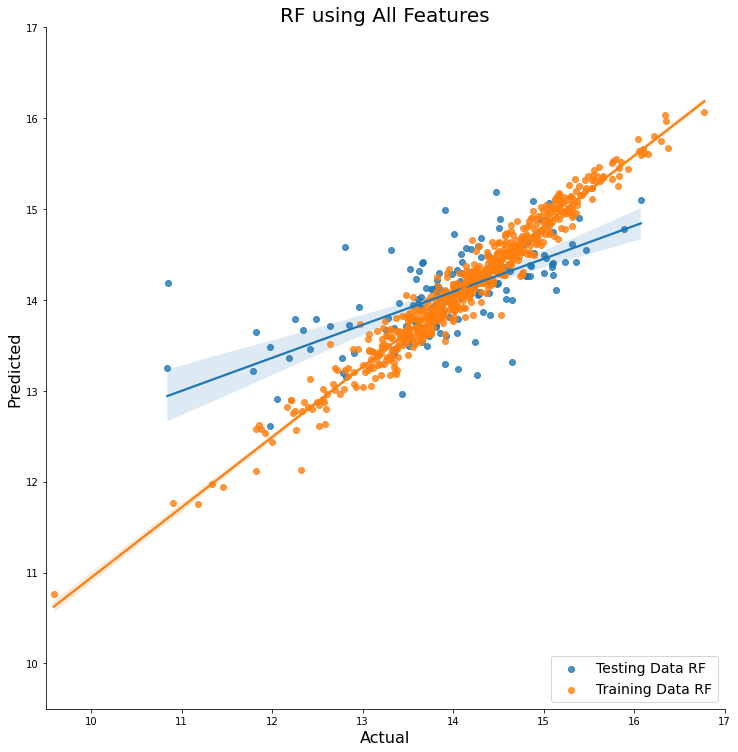

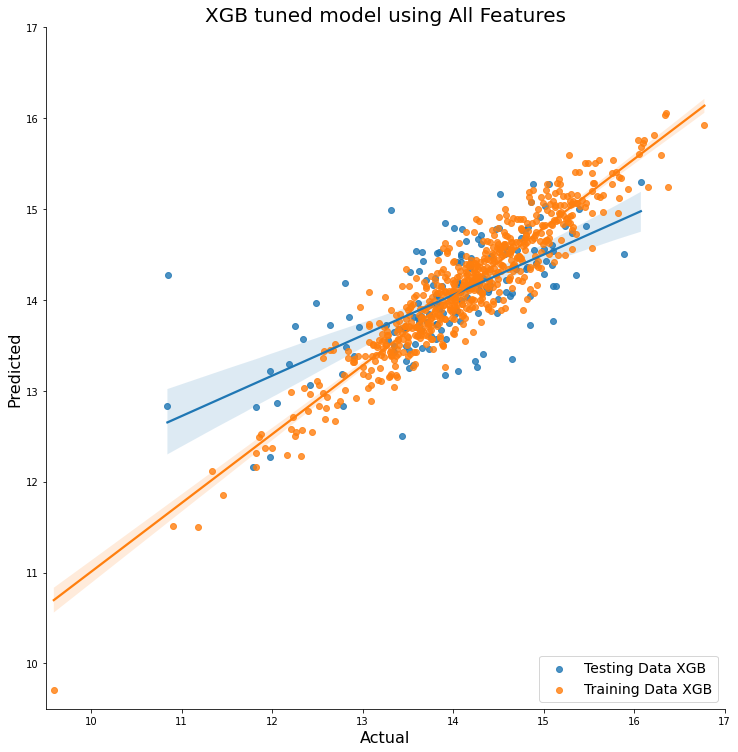

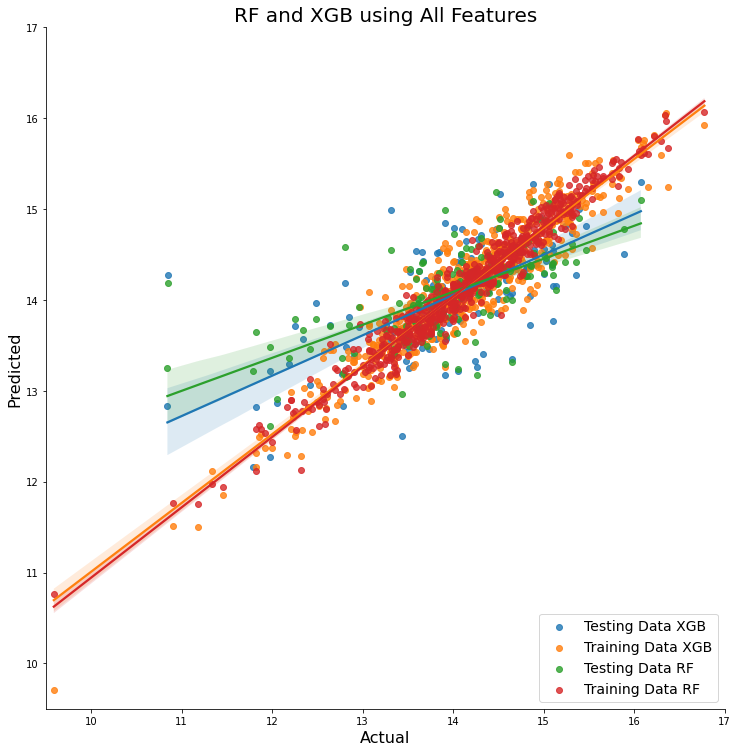

In [4]:
mae, regr = getMAEandPlots(xgb, X_log_train, X_log_test, y_log_train, y_log_test)

In [5]:
X_corr, X_train_corr, X_test_corr = getCorrAndHighCorrFeatures(X_log, y_log, X_log_train, X_log_test)

In [6]:
xgb_corr = buildNewModelAndFit(params, X_train_corr, y_log_train)

<Figure size 1440x1440 with 0 Axes>

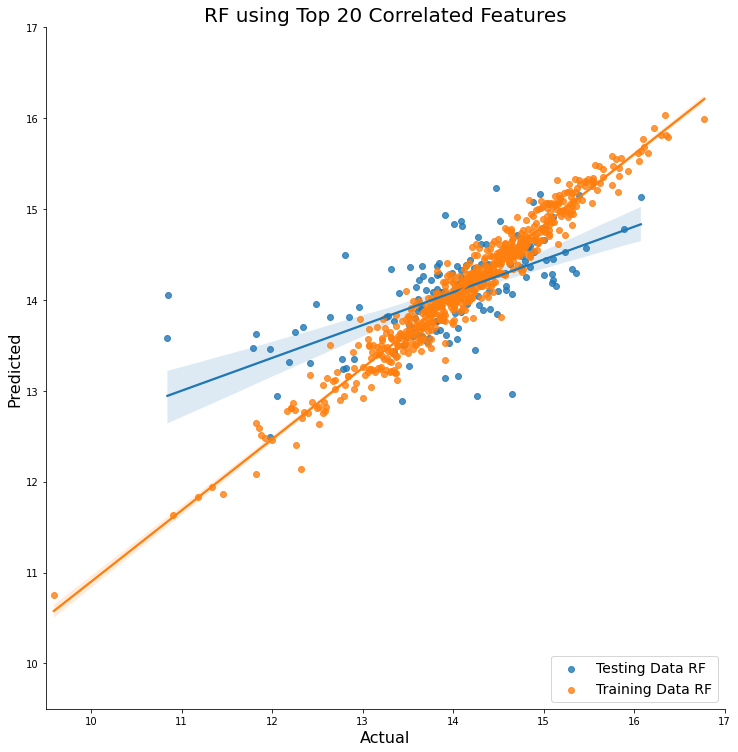

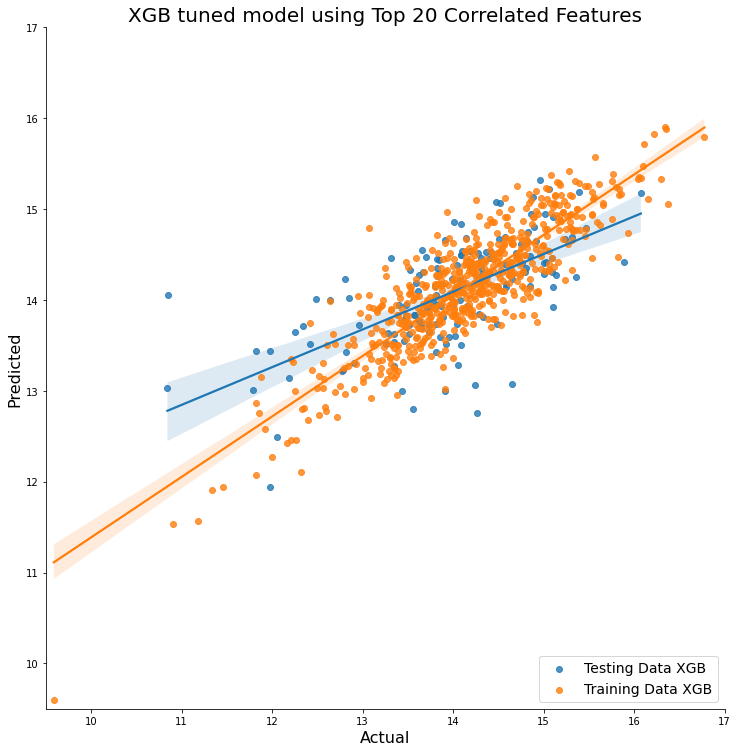

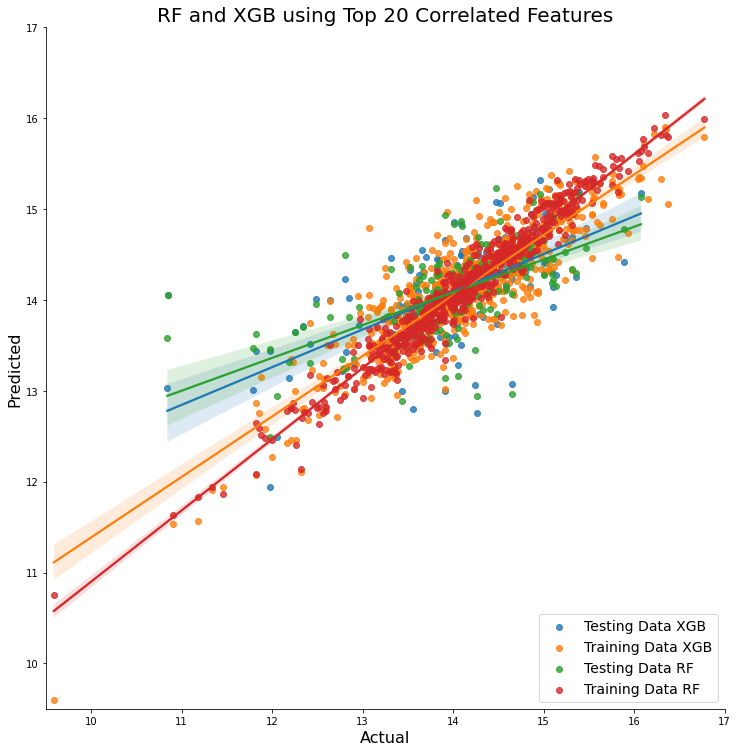

In [7]:
mae_corr, regr_corr = getMAEandPlots(xgb_corr, X_train_corr, X_test_corr, y_log_train, y_log_test, 'Top 20 Correlated Features')

In [8]:
perm_xgb, perm_regr, X_RF_train, X_RF_test, X_XGB_train, X_XGB_test = permImportance(params, X_log_train, X_log_test, y_log_train, y_log_test)

In [9]:
xgb_RF_perm = buildNewModelAndFit(params, X_RF_train, y_log_train)

<Figure size 1440x1440 with 0 Axes>

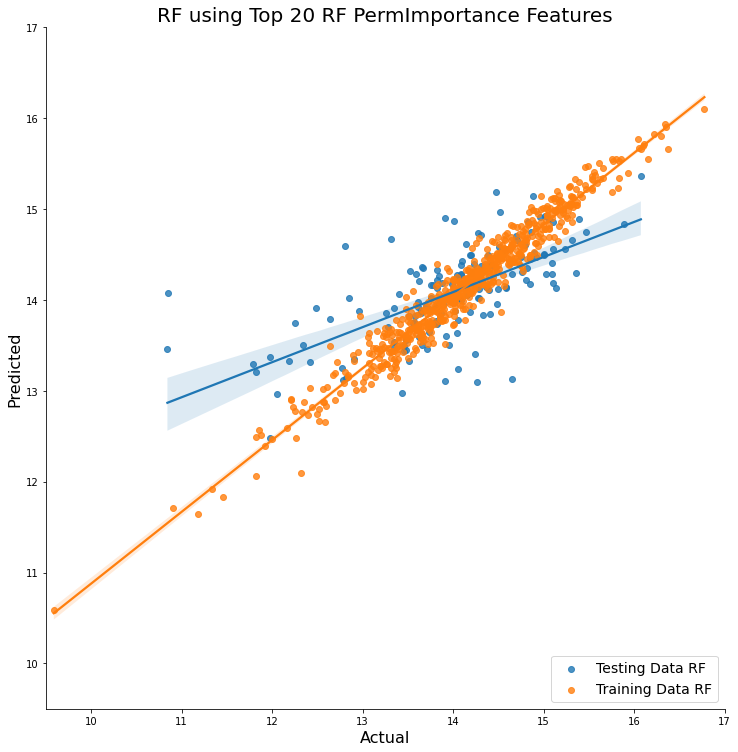

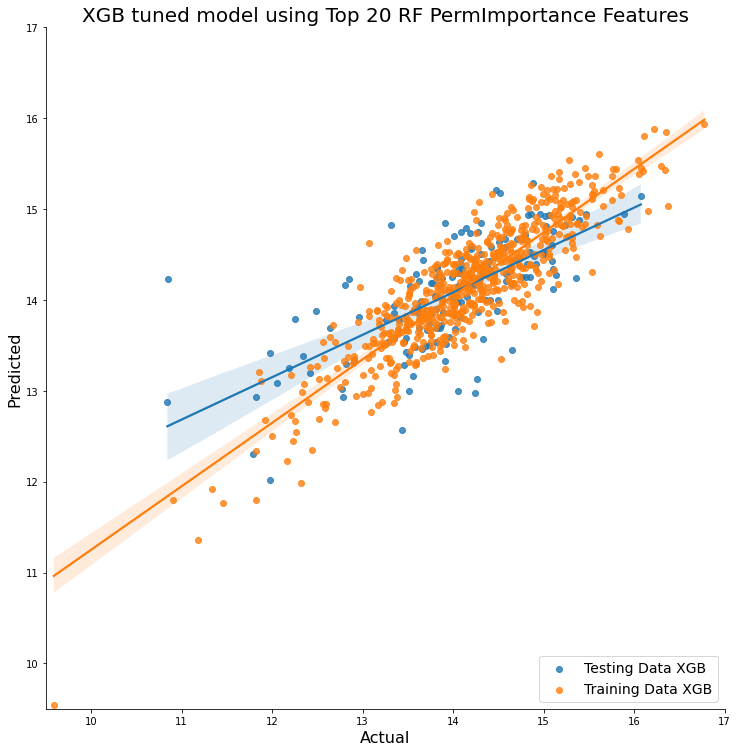

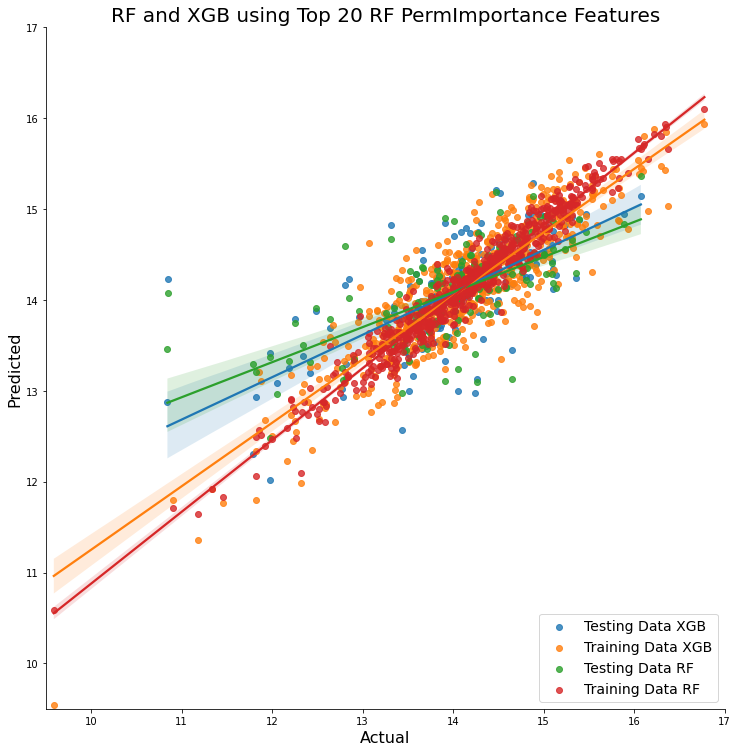

In [10]:
mae_RF_perm, regr_RF_perm = getMAEandPlots(xgb_RF_perm, X_RF_train, X_RF_test, y_log_train, y_log_test, 'Top 20 RF PermImportance Features')

In [11]:
xgb_XGB_perm = buildNewModelAndFit(params, X_XGB_train, y_log_train)

<Figure size 1440x1440 with 0 Axes>

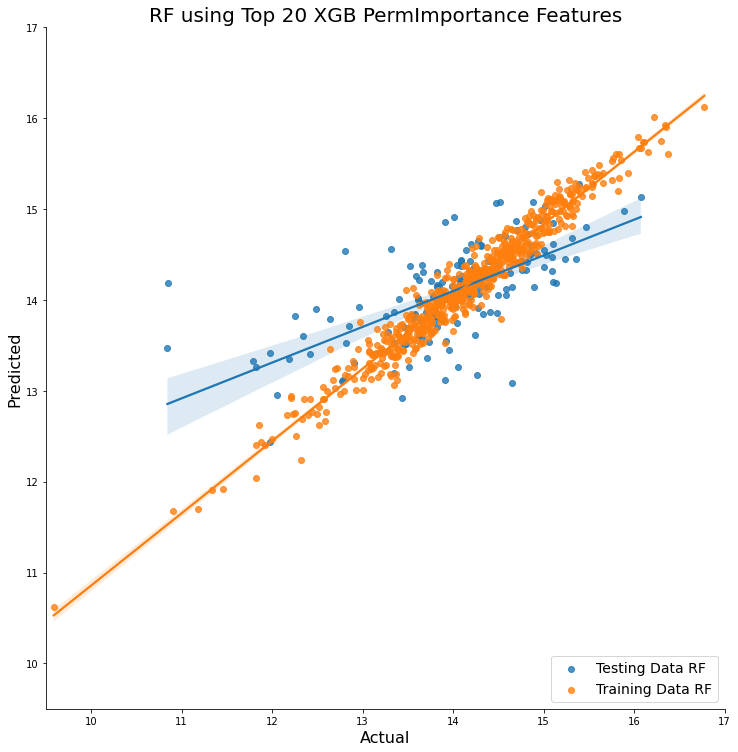

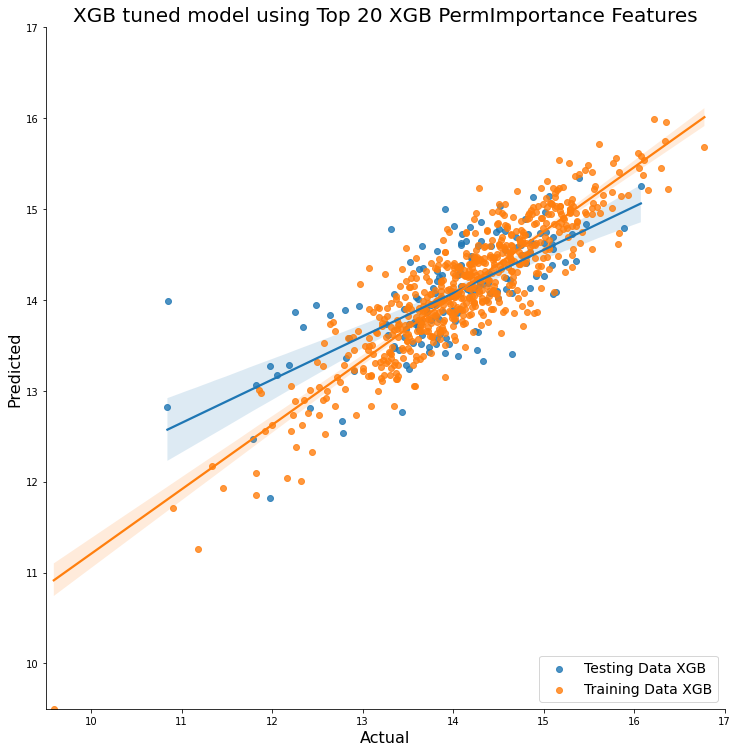

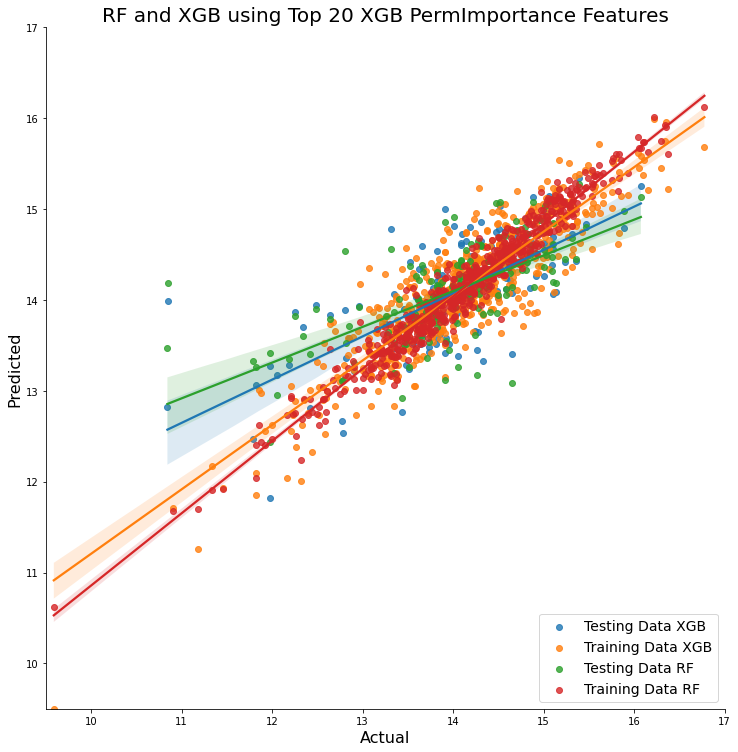

In [12]:
mae_XGB_perm, regr_XGB_perm = getMAEandPlots(xgb_XGB_perm, X_XGB_train, X_XGB_test, y_log_train, y_log_test, 'Top 20 XGB PermImportance Features')

In [13]:
writeToFile(mae, mae_corr, mae_RF_perm, mae_XGB_perm, X_corr, perm_regr, perm_xgb)

In [14]:
dumpModels(xgb, xgb_corr, xgb_RF_perm, xgb_XGB_perm, regr, regr_corr, regr_RF_perm, regr_XGB_perm)